# Generative Adversarial Network

## Pre-processing data

In [1]:
import tensorflow as tf
import numpy as np
from IPython.display import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os
tf.reset_default_graph()

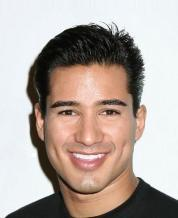

In [2]:
Image("img_align_celeba/000214.jpg") 

In [3]:
    
## Here we will get the 100 000 first images and put them in a variable 178*218*3
data_size = 25001
def get_data(data_size=25001):
        dataset = []
        for x in range(1, data_size):
            imgname = "img_align_celeba/"
            for i in range(0, 6-len(str(x))):
                imgname += "0"
            imgname += str(x) + ".jpg"
            dataset.append(mpimg.imread(imgname))
        dataset =  np.array(dataset)
        print("Data loaded. Number of images: " + str(data_size))
        return dataset
    
def get_data_normalized(data_size=25001):
        dataset = []
        for x in range(1, data_size):
            imgname = "img_align_celeba/"
            for i in range(0, 6-len(str(x))):
                imgname += "0"
            imgname += str(x) + ".jpg"
            dataset.append(mpimg.imread(imgname))
        dataset =  np.array(dataset)/256.0
        print("Data loaded. Number of images: " + str(data_size))
        return dataset
        
def get_batch(batch_size, dataset):
        indexes = np.random.randint(0, len(dataset), batch_size)
        data = dataset[indexes]
        return data

def sample_Z(batch_size=50, n=100):
        return np.random.uniform(-1., 1., size=[batch_size, n])

Data loaded. Number of images: 5
[[[0.98828125 0.90234375 0.7578125 ]
  [0.98828125 0.90234375 0.7578125 ]
  [0.98828125 0.90234375 0.7578125 ]
  ...
  [0.9609375  0.890625   0.84375   ]
  [0.99609375 0.92578125 0.87109375]
  [0.9921875  0.9296875  0.8671875 ]]

 [[0.98828125 0.90234375 0.7578125 ]
  [0.98828125 0.90234375 0.7578125 ]
  [0.98828125 0.90234375 0.7578125 ]
  ...
  [0.96875    0.8984375  0.8515625 ]
  [0.99609375 0.92578125 0.87109375]
  [0.9921875  0.9296875  0.8671875 ]]

 [[0.98828125 0.90234375 0.7578125 ]
  [0.98828125 0.90234375 0.7578125 ]
  [0.98828125 0.90234375 0.7578125 ]
  ...
  [0.9765625  0.90625    0.859375  ]
  [0.99609375 0.9296875  0.875     ]
  [0.99609375 0.93359375 0.87109375]]

 ...

 [[0.546875   0.2890625  0.1015625 ]
  [0.44921875 0.19140625 0.00390625]
  [0.5703125  0.3046875  0.12890625]
  ...
  [0.4765625  0.21484375 0.109375  ]
  [0.48046875 0.21875    0.1171875 ]
  [0.4765625  0.21875    0.1171875 ]]

 [[0.5078125  0.2421875  0.05859375]
  [0

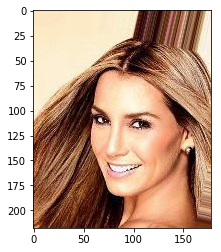

In [5]:
dat = get_data_normalized(5)
print(dat[0])
plt.imshow(dat[0])

In [4]:
def generator_mlp(Z, fc_sizes=[110,200,300], output_dim=218*178*3, reuse=False):
    
    with tf.variable_scope("GAN/Generator",reuse=reuse):
        fc1 = tf.layers.dense(Z, fc_sizes[0], activation=tf.nn.leaky_relu)
        fc2 = tf.layers.dense(fc1, fc_sizes[1], activation=tf.nn.leaky_relu)
        fc3 = tf.layers.dense(fc2, fc_sizes[2], activation=tf.nn.leaky_relu)
        out = tf.layers.dense(fc3, output_dim)
    return out


In [5]:
def discriminator_mlp(X, fc_sizes=[110,300,200], reuse=False):
    
    with tf.variable_scope("GAN/Discriminator",reuse=reuse):
        h1 = tf.layers.dense(X,fc_sizes[0],activation=tf.nn.leaky_relu)
        h2 = tf.layers.dense(h1,fc_sizes[1],activation=tf.nn.leaky_relu)
        h3 = tf.layers.dense(h2,fc_sizes[2],activation=tf.nn.leaky_relu)
        out = tf.layers.dense(h3,1)

    return out

In [6]:
X = tf.placeholder(tf.float32,[None,218,178,3])
XX = tf.reshape(X, shape=(tf.shape(X)[0], 218*178*3))
Z = tf.placeholder(tf.float32,[None,100])

In [7]:
G_sample = generator_mlp(Z)
r_logits = discriminator_mlp(XX)
f_logits = discriminator_mlp(G_sample, reuse=True)

In [8]:
disc_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=r_logits,labels=tf.ones_like(r_logits)) + tf.nn.sigmoid_cross_entropy_with_logits(logits=f_logits,labels=tf.zeros_like(f_logits)))
gen_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=f_logits,labels=tf.ones_like(f_logits)))


In [9]:
gen_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES,scope="GAN/Generator")
disc_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES,scope="GAN/Discriminator")

gen_step = tf.train.RMSPropOptimizer(learning_rate=0.001).minimize(gen_loss,var_list = gen_vars) # G Train step
disc_step = tf.train.RMSPropOptimizer(learning_rate=0.001).minimize(disc_loss,var_list = disc_vars) # D Train step


Data loaded. Number of images: 10000
Iterations: 0	 Discriminator loss: 1.5252	 Generator loss: 0.6932
Iterations: 1	 Discriminator loss: 1.1233	 Generator loss: 0.6932
Iterations: 2	 Discriminator loss: 0.9515	 Generator loss: 0.6934
Iterations: 3	 Discriminator loss: 0.9563	 Generator loss: 0.6925
Iterations: 4	 Discriminator loss: 0.8499	 Generator loss: 0.6944
Iterations: 5	 Discriminator loss: 0.8473	 Generator loss: 0.6953
Iterations: 6	 Discriminator loss: 0.7773	 Generator loss: 0.6948
Iterations: 7	 Discriminator loss: 0.7797	 Generator loss: 0.6976
Iterations: 8	 Discriminator loss: 0.7486	 Generator loss: 0.6977
Iterations: 9	 Discriminator loss: 0.7517	 Generator loss: 0.6973
Iterations: 10	 Discriminator loss: 0.7628	 Generator loss: 0.6992
Iterations: 11	 Discriminator loss: 0.7365	 Generator loss: 0.6989
Iterations: 12	 Discriminator loss: 0.7387	 Generator loss: 0.7001
Iterations: 13	 Discriminator loss: 0.7305	 Generator loss: 0.7014
Iterations: 14	 Discriminator loss:

Iterations: 122	 Discriminator loss: 0.0720	 Generator loss: 2.8384
Iterations: 123	 Discriminator loss: 0.0682	 Generator loss: 2.9215
Iterations: 124	 Discriminator loss: 0.0674	 Generator loss: 3.0214
Iterations: 125	 Discriminator loss: 0.0662	 Generator loss: 3.1483
Iterations: 126	 Discriminator loss: 0.0646	 Generator loss: 3.1873
Iterations: 127	 Discriminator loss: 0.0627	 Generator loss: 3.1986
Iterations: 128	 Discriminator loss: 0.0575	 Generator loss: 3.4030
Iterations: 129	 Discriminator loss: 0.0470	 Generator loss: 3.1316
Iterations: 130	 Discriminator loss: 0.1631	 Generator loss: 4.9612
Iterations: 131	 Discriminator loss: 15.5137	 Generator loss: 2.8190
Iterations: 132	 Discriminator loss: 313.9396	 Generator loss: 5.2785
Iterations: 133	 Discriminator loss: 44.0438	 Generator loss: 0.0000
Iterations: 134	 Discriminator loss: 32.0723	 Generator loss: 0.0000
Iterations: 135	 Discriminator loss: 30.6701	 Generator loss: 0.0000
Iterations: 136	 Discriminator loss: 22.86

Iterations: 241	 Discriminator loss: 15.4096	 Generator loss: 14.5723
Iterations: 242	 Discriminator loss: 13.6765	 Generator loss: 0.0000
Iterations: 243	 Discriminator loss: 30.5185	 Generator loss: 0.0009
Iterations: 244	 Discriminator loss: 12.4812	 Generator loss: 1.5743
Iterations: 245	 Discriminator loss: 42.0634	 Generator loss: 0.0000
Iterations: 246	 Discriminator loss: 64.3103	 Generator loss: 0.0000
Iterations: 247	 Discriminator loss: 48.5586	 Generator loss: 0.0000
Iterations: 248	 Discriminator loss: 34.4351	 Generator loss: 0.0000
Iterations: 249	 Discriminator loss: 23.4478	 Generator loss: 0.0042
Iterations: 250	 Discriminator loss: 11.3670	 Generator loss: 4.8443
Iterations: 251	 Discriminator loss: 10.0606	 Generator loss: 10.6688
Iterations: 252	 Discriminator loss: 56.1955	 Generator loss: 0.0000
Iterations: 253	 Discriminator loss: 43.6085	 Generator loss: 0.0000
Iterations: 254	 Discriminator loss: 26.7960	 Generator loss: 0.0001
Iterations: 255	 Discriminator l

Iterations: 360	 Discriminator loss: 16.3072	 Generator loss: 4.4740
Iterations: 361	 Discriminator loss: 45.7068	 Generator loss: 0.0000
Iterations: 362	 Discriminator loss: 28.3664	 Generator loss: 0.0023
Iterations: 363	 Discriminator loss: 15.8710	 Generator loss: 1.1093
Iterations: 364	 Discriminator loss: 4.4583	 Generator loss: 10.0166
Iterations: 365	 Discriminator loss: 3.6474	 Generator loss: 9.3607
Iterations: 366	 Discriminator loss: 20.0687	 Generator loss: 0.0000
Iterations: 367	 Discriminator loss: 32.3113	 Generator loss: 0.0000
Iterations: 368	 Discriminator loss: 26.1840	 Generator loss: 0.0000
Iterations: 369	 Discriminator loss: 17.8347	 Generator loss: 0.0010
Iterations: 370	 Discriminator loss: 9.4830	 Generator loss: 3.0836
Iterations: 371	 Discriminator loss: 8.1009	 Generator loss: 1.6792
Iterations: 372	 Discriminator loss: 5.1178	 Generator loss: 0.0000
Iterations: 373	 Discriminator loss: 19.5004	 Generator loss: 0.0006
Iterations: 374	 Discriminator loss: 9

Iterations: 480	 Discriminator loss: 6.8006	 Generator loss: 1.9120
Iterations: 481	 Discriminator loss: 6.9098	 Generator loss: 0.0000
Iterations: 482	 Discriminator loss: 12.3219	 Generator loss: 0.0170
Iterations: 483	 Discriminator loss: 4.9892	 Generator loss: 1.1243
Iterations: 484	 Discriminator loss: 1.4215	 Generator loss: 4.5681
Iterations: 485	 Discriminator loss: 5.4452	 Generator loss: 0.0000
Iterations: 486	 Discriminator loss: 18.1021	 Generator loss: 0.0001
Iterations: 487	 Discriminator loss: 9.8882	 Generator loss: 0.0244
Iterations: 488	 Discriminator loss: 4.0938	 Generator loss: 1.8388
Iterations: 489	 Discriminator loss: 2.3623	 Generator loss: 0.3061
Iterations: 490	 Discriminator loss: 1.6276	 Generator loss: 7.1752
Iterations: 491	 Discriminator loss: 12.5872	 Generator loss: 0.0000
Iterations: 492	 Discriminator loss: 14.4718	 Generator loss: 0.0017
Iterations: 493	 Discriminator loss: 8.6128	 Generator loss: 0.0499
Iterations: 494	 Discriminator loss: 4.4446	

Iterations: 600	 Discriminator loss: 0.8072	 Generator loss: 0.2602
Iterations: 601	 Discriminator loss: 2.2089	 Generator loss: 3.1245
Iterations: 602	 Discriminator loss: 1.9340	 Generator loss: 0.0184
Iterations: 603	 Discriminator loss: 4.6891	 Generator loss: 0.4390
Iterations: 604	 Discriminator loss: 1.5021	 Generator loss: 2.8207
Iterations: 605	 Discriminator loss: 0.8066	 Generator loss: 0.4086
Iterations: 606	 Discriminator loss: 1.2145	 Generator loss: 1.9113
Iterations: 607	 Discriminator loss: 0.4231	 Generator loss: 0.5214
Iterations: 608	 Discriminator loss: 0.9697	 Generator loss: 1.9930
Iterations: 609	 Discriminator loss: 0.3905	 Generator loss: 0.6685
Iterations: 610	 Discriminator loss: 0.9133	 Generator loss: 3.2021
Iterations: 611	 Discriminator loss: 2.0980	 Generator loss: 0.0002
Iterations: 612	 Discriminator loss: 12.5295	 Generator loss: 0.0084
Iterations: 613	 Discriminator loss: 4.1422	 Generator loss: 14.7399
Iterations: 614	 Discriminator loss: 31.5623	 

Iterations: 721	 Discriminator loss: 5.7266	 Generator loss: 0.1608
Iterations: 722	 Discriminator loss: 4.1309	 Generator loss: 0.8031
Iterations: 723	 Discriminator loss: 1.3290	 Generator loss: 1.8972
Iterations: 724	 Discriminator loss: 0.5313	 Generator loss: 1.8274
Iterations: 725	 Discriminator loss: 0.6625	 Generator loss: 0.4486
Iterations: 726	 Discriminator loss: 1.1342	 Generator loss: 2.2766
Iterations: 727	 Discriminator loss: 4.2905	 Generator loss: 0.0011
Iterations: 728	 Discriminator loss: 8.0186	 Generator loss: 0.0143
Iterations: 729	 Discriminator loss: 5.0498	 Generator loss: 0.2403
Iterations: 730	 Discriminator loss: 2.2894	 Generator loss: 1.2248
Iterations: 731	 Discriminator loss: 0.8827	 Generator loss: 2.6528
Iterations: 732	 Discriminator loss: 2.6466	 Generator loss: 0.0078
Iterations: 733	 Discriminator loss: 5.5673	 Generator loss: 0.1336
Iterations: 734	 Discriminator loss: 2.8137	 Generator loss: 0.7067
Iterations: 735	 Discriminator loss: 0.6968	 Gen

Iterations: 843	 Discriminator loss: 1.0856	 Generator loss: 2.2448
Iterations: 844	 Discriminator loss: 1.9556	 Generator loss: 0.0350
Iterations: 845	 Discriminator loss: 4.4155	 Generator loss: 0.6063
Iterations: 846	 Discriminator loss: 0.6351	 Generator loss: 2.3635
Iterations: 847	 Discriminator loss: 1.2937	 Generator loss: 0.1111
Iterations: 848	 Discriminator loss: 3.2361	 Generator loss: 1.7286
Iterations: 849	 Discriminator loss: 1.1609	 Generator loss: 0.5923
Iterations: 850	 Discriminator loss: 1.0058	 Generator loss: 1.9321
Iterations: 851	 Discriminator loss: 1.2539	 Generator loss: 0.1852
Iterations: 852	 Discriminator loss: 2.2043	 Generator loss: 2.7566
Iterations: 853	 Discriminator loss: 1.5911	 Generator loss: 0.1169
Iterations: 854	 Discriminator loss: 4.8002	 Generator loss: 14.3555
Iterations: 855	 Discriminator loss: 12.3241	 Generator loss: 0.0313
Iterations: 856	 Discriminator loss: 7.8469	 Generator loss: 77.2271
Iterations: 857	 Discriminator loss: 60.0999	

Iterations: 964	 Discriminator loss: 1.1576	 Generator loss: 0.1430
Iterations: 965	 Discriminator loss: 2.2231	 Generator loss: 1.7101
Iterations: 966	 Discriminator loss: 0.6835	 Generator loss: 0.5751
Iterations: 967	 Discriminator loss: 1.3085	 Generator loss: 2.1015
Iterations: 968	 Discriminator loss: 1.0392	 Generator loss: 0.2942
Iterations: 969	 Discriminator loss: 1.8913	 Generator loss: 2.1004
Iterations: 970	 Discriminator loss: 1.4473	 Generator loss: 0.3008
Iterations: 971	 Discriminator loss: 1.8433	 Generator loss: 1.5912
Iterations: 972	 Discriminator loss: 0.8490	 Generator loss: 0.4395
Iterations: 973	 Discriminator loss: 0.9082	 Generator loss: 1.5226
Iterations: 974	 Discriminator loss: 1.0798	 Generator loss: 0.7034
Iterations: 975	 Discriminator loss: 0.9269	 Generator loss: 1.5993
Iterations: 976	 Discriminator loss: 0.4965	 Generator loss: 0.9905
Iterations: 977	 Discriminator loss: 0.8924	 Generator loss: 1.8254
Iterations: 978	 Discriminator loss: 1.3693	 Gen

Iterations: 1084	 Discriminator loss: 1.0592	 Generator loss: 0.5367
Iterations: 1085	 Discriminator loss: 0.9309	 Generator loss: 1.8207
Iterations: 1086	 Discriminator loss: 0.9649	 Generator loss: 0.4085
Iterations: 1087	 Discriminator loss: 1.3511	 Generator loss: 2.0826
Iterations: 1088	 Discriminator loss: 0.9894	 Generator loss: 0.1344
Iterations: 1089	 Discriminator loss: 1.9392	 Generator loss: 2.6857
Iterations: 1090	 Discriminator loss: 1.5983	 Generator loss: 0.0047
Iterations: 1091	 Discriminator loss: 5.6187	 Generator loss: 1.5072
Iterations: 1092	 Discriminator loss: 2.3696	 Generator loss: 2.2529
Iterations: 1093	 Discriminator loss: 2.3127	 Generator loss: 0.0002
Iterations: 1094	 Discriminator loss: 15.9677	 Generator loss: 2.9548
Iterations: 1095	 Discriminator loss: 2.5439	 Generator loss: 0.0223
Iterations: 1096	 Discriminator loss: 3.6089	 Generator loss: 3.6478
Iterations: 1097	 Discriminator loss: 3.1186	 Generator loss: 0.0118
Iterations: 1098	 Discriminator l

Iterations: 1203	 Discriminator loss: 1.3679	 Generator loss: 1.6693
Iterations: 1204	 Discriminator loss: 1.4156	 Generator loss: 0.4702
Iterations: 1205	 Discriminator loss: 1.2948	 Generator loss: 1.8378
Iterations: 1206	 Discriminator loss: 1.5879	 Generator loss: 0.2845
Iterations: 1207	 Discriminator loss: 2.1641	 Generator loss: 1.9772
Iterations: 1208	 Discriminator loss: 1.4586	 Generator loss: 0.5228
Iterations: 1209	 Discriminator loss: 2.7493	 Generator loss: 6.0607
Iterations: 1210	 Discriminator loss: 1.2698	 Generator loss: 2.2468
Iterations: 1211	 Discriminator loss: 0.9302	 Generator loss: 2.0071
Iterations: 1212	 Discriminator loss: 2.4851	 Generator loss: 2.0082
Iterations: 1213	 Discriminator loss: 1.4832	 Generator loss: 4.2071
Iterations: 1214	 Discriminator loss: 2.1070	 Generator loss: 0.0002
Iterations: 1215	 Discriminator loss: 14.4282	 Generator loss: 2.6008
Iterations: 1216	 Discriminator loss: 1.9598	 Generator loss: 0.0261
Iterations: 1217	 Discriminator l

Iterations: 1322	 Discriminator loss: 2.0830	 Generator loss: 1.9262
Iterations: 1323	 Discriminator loss: 1.4137	 Generator loss: 0.7579
Iterations: 1324	 Discriminator loss: 1.0076	 Generator loss: 1.9261
Iterations: 1325	 Discriminator loss: 0.9746	 Generator loss: 0.4056
Iterations: 1326	 Discriminator loss: 1.5859	 Generator loss: 3.0375
Iterations: 1327	 Discriminator loss: 0.9068	 Generator loss: 2.0021
Iterations: 1328	 Discriminator loss: 3.8177	 Generator loss: 0.3548
Iterations: 1329	 Discriminator loss: 1.5311	 Generator loss: 3.6807
Iterations: 1330	 Discriminator loss: 2.0938	 Generator loss: 0.4132
Iterations: 1331	 Discriminator loss: 2.0873	 Generator loss: 3.5926
Iterations: 1332	 Discriminator loss: 1.8956	 Generator loss: 0.8903
Iterations: 1333	 Discriminator loss: 3.6713	 Generator loss: 3.9524
Iterations: 1334	 Discriminator loss: 3.1349	 Generator loss: 0.2258
Iterations: 1335	 Discriminator loss: 3.3712	 Generator loss: 7.6575
Iterations: 1336	 Discriminator lo

Iterations: 1442	 Discriminator loss: 1.4133	 Generator loss: 0.1844
Iterations: 1443	 Discriminator loss: 4.0654	 Generator loss: 3.3409
Iterations: 1444	 Discriminator loss: 2.1266	 Generator loss: 0.0189
Iterations: 1445	 Discriminator loss: 3.7825	 Generator loss: 4.2022
Iterations: 1446	 Discriminator loss: 2.4896	 Generator loss: 0.0447
Iterations: 1447	 Discriminator loss: 4.4366	 Generator loss: 3.6599
Iterations: 1448	 Discriminator loss: 2.9349	 Generator loss: 0.8152
Iterations: 1449	 Discriminator loss: 1.0794	 Generator loss: 1.6156
Iterations: 1450	 Discriminator loss: 0.6034	 Generator loss: 1.3327
Iterations: 1451	 Discriminator loss: 1.3410	 Generator loss: 1.2609
Iterations: 1452	 Discriminator loss: 0.8221	 Generator loss: 1.0142
Iterations: 1453	 Discriminator loss: 3.5400	 Generator loss: 3.2417
Iterations: 1454	 Discriminator loss: 1.2874	 Generator loss: 1.5560
Iterations: 1455	 Discriminator loss: 3.8059	 Generator loss: 8.2456
Iterations: 1456	 Discriminator lo

Iterations: 1561	 Discriminator loss: 2.8109	 Generator loss: 1.6930
Iterations: 1562	 Discriminator loss: 1.2876	 Generator loss: 0.3804
Iterations: 1563	 Discriminator loss: 1.6368	 Generator loss: 1.7702
Iterations: 1564	 Discriminator loss: 1.2328	 Generator loss: 0.5106
Iterations: 1565	 Discriminator loss: 1.3377	 Generator loss: 1.8297
Iterations: 1566	 Discriminator loss: 1.5603	 Generator loss: 0.3641
Iterations: 1567	 Discriminator loss: 1.6965	 Generator loss: 1.8527
Iterations: 1568	 Discriminator loss: 1.3312	 Generator loss: 0.5858
Iterations: 1569	 Discriminator loss: 1.3467	 Generator loss: 1.3977
Iterations: 1570	 Discriminator loss: 1.5101	 Generator loss: 0.7579
Iterations: 1571	 Discriminator loss: 1.2423	 Generator loss: 1.8202
Iterations: 1572	 Discriminator loss: 1.5425	 Generator loss: 0.3511
Iterations: 1573	 Discriminator loss: 2.3389	 Generator loss: 2.3600
Iterations: 1574	 Discriminator loss: 1.9674	 Generator loss: 0.2986
Iterations: 1575	 Discriminator lo

Iterations: 1680	 Discriminator loss: 1.8550	 Generator loss: 0.5672
Iterations: 1681	 Discriminator loss: 1.4902	 Generator loss: 1.6678
Iterations: 1682	 Discriminator loss: 1.5945	 Generator loss: 0.4654
Iterations: 1683	 Discriminator loss: 1.6114	 Generator loss: 1.5427
Iterations: 1684	 Discriminator loss: 0.9901	 Generator loss: 0.2360
Iterations: 1685	 Discriminator loss: 7.0702	 Generator loss: 2.0338
Iterations: 1686	 Discriminator loss: 3.5822	 Generator loss: 5.2523
Iterations: 1687	 Discriminator loss: 3.7064	 Generator loss: 0.0077
Iterations: 1688	 Discriminator loss: 8.0188	 Generator loss: 4.0569
Iterations: 1689	 Discriminator loss: 2.7180	 Generator loss: 0.9545
Iterations: 1690	 Discriminator loss: 1.4196	 Generator loss: 0.8424
Iterations: 1691	 Discriminator loss: 1.1065	 Generator loss: 1.3449
Iterations: 1692	 Discriminator loss: 1.6057	 Generator loss: 0.5248
Iterations: 1693	 Discriminator loss: 1.3504	 Generator loss: 1.8365
Iterations: 1694	 Discriminator lo

Iterations: 1799	 Discriminator loss: 2.5238	 Generator loss: 0.0357
Iterations: 1800	 Discriminator loss: 3.7699	 Generator loss: 2.8925
Iterations: 1801	 Discriminator loss: 2.6079	 Generator loss: 0.3791
Iterations: 1802	 Discriminator loss: 1.4714	 Generator loss: 2.6310
Iterations: 1803	 Discriminator loss: 1.9515	 Generator loss: 0.1038
Iterations: 1804	 Discriminator loss: 5.0512	 Generator loss: 6.1633
Iterations: 1805	 Discriminator loss: 5.8847	 Generator loss: 0.2256
Iterations: 1806	 Discriminator loss: 3.5262	 Generator loss: 32.2654
Iterations: 1807	 Discriminator loss: 19.1867	 Generator loss: 0.0670
Iterations: 1808	 Discriminator loss: 5.9341	 Generator loss: 3.4490
Iterations: 1809	 Discriminator loss: 2.6969	 Generator loss: 0.3673
Iterations: 1810	 Discriminator loss: 1.2679	 Generator loss: 1.1088
Iterations: 1811	 Discriminator loss: 1.0194	 Generator loss: 1.0013
Iterations: 1812	 Discriminator loss: 1.8436	 Generator loss: 0.6488
Iterations: 1813	 Discriminator 

Iterations: 1918	 Discriminator loss: 1.8684	 Generator loss: 0.2726
Iterations: 1919	 Discriminator loss: 2.1966	 Generator loss: 2.6542
Iterations: 1920	 Discriminator loss: 2.5820	 Generator loss: 0.4003
Iterations: 1921	 Discriminator loss: 1.8608	 Generator loss: 1.5901
Iterations: 1922	 Discriminator loss: 1.3466	 Generator loss: 0.0460
Iterations: 1923	 Discriminator loss: 4.3861	 Generator loss: 47.7656
Iterations: 1924	 Discriminator loss: 27.6218	 Generator loss: 0.0000
Iterations: 1925	 Discriminator loss: 26.6972	 Generator loss: 17.5216
Iterations: 1926	 Discriminator loss: 13.6426	 Generator loss: 0.0090
Iterations: 1927	 Discriminator loss: 5.6303	 Generator loss: 4.3470
Iterations: 1928	 Discriminator loss: 4.3092	 Generator loss: 0.0563
Iterations: 1929	 Discriminator loss: 3.7806	 Generator loss: 2.1764
Iterations: 1930	 Discriminator loss: 1.2281	 Generator loss: 0.4300
Iterations: 1931	 Discriminator loss: 1.0616	 Generator loss: 1.9458
Iterations: 1932	 Discriminat

Iterations: 2037	 Discriminator loss: 1.1572	 Generator loss: 0.9178
Iterations: 2038	 Discriminator loss: 2.3645	 Generator loss: 2.2121
Iterations: 2039	 Discriminator loss: 1.7007	 Generator loss: 0.5817
Iterations: 2040	 Discriminator loss: 1.3286	 Generator loss: 1.3055
Iterations: 2041	 Discriminator loss: 1.2240	 Generator loss: 0.4485
Iterations: 2042	 Discriminator loss: 2.0211	 Generator loss: 2.0792
Iterations: 2043	 Discriminator loss: 2.1153	 Generator loss: 0.4978
Iterations: 2044	 Discriminator loss: 1.6642	 Generator loss: 1.6151
Iterations: 2045	 Discriminator loss: 1.5494	 Generator loss: 0.4515
Iterations: 2046	 Discriminator loss: 1.7180	 Generator loss: 1.3601
Iterations: 2047	 Discriminator loss: 1.4856	 Generator loss: 0.7449
Iterations: 2048	 Discriminator loss: 1.4511	 Generator loss: 1.6505
Iterations: 2049	 Discriminator loss: 1.6728	 Generator loss: 0.4016
Iterations: 2050	 Discriminator loss: 2.7200	 Generator loss: 1.9503
Iterations: 2051	 Discriminator lo

Iterations: 2156	 Discriminator loss: 1.5329	 Generator loss: 0.6004
Iterations: 2157	 Discriminator loss: 1.2600	 Generator loss: 1.5932
Iterations: 2158	 Discriminator loss: 1.1858	 Generator loss: 0.0778
Iterations: 2159	 Discriminator loss: 3.8211	 Generator loss: 2.3338
Iterations: 2160	 Discriminator loss: 2.1017	 Generator loss: 0.0328
Iterations: 2161	 Discriminator loss: 7.5449	 Generator loss: 17.4263
Iterations: 2162	 Discriminator loss: 12.9079	 Generator loss: 0.5009
Iterations: 2163	 Discriminator loss: 3.2091	 Generator loss: 6.3266
Iterations: 2164	 Discriminator loss: 5.7320	 Generator loss: 0.7835
Iterations: 2165	 Discriminator loss: 1.2148	 Generator loss: 1.3912
Iterations: 2166	 Discriminator loss: 1.2738	 Generator loss: 0.3958
Iterations: 2167	 Discriminator loss: 1.2444	 Generator loss: 1.3893
Iterations: 2168	 Discriminator loss: 1.3422	 Generator loss: 0.4469
Iterations: 2169	 Discriminator loss: 1.2491	 Generator loss: 1.2146
Iterations: 2170	 Discriminator 

Iterations: 2275	 Discriminator loss: 1.5348	 Generator loss: 1.7542
Iterations: 2276	 Discriminator loss: 1.8772	 Generator loss: 1.4119
Iterations: 2277	 Discriminator loss: 1.4072	 Generator loss: 0.4262
Iterations: 2278	 Discriminator loss: 1.8196	 Generator loss: 2.7536
Iterations: 2279	 Discriminator loss: 2.1397	 Generator loss: 0.5630
Iterations: 2280	 Discriminator loss: 1.6458	 Generator loss: 1.1125
Iterations: 2281	 Discriminator loss: 0.8893	 Generator loss: 1.0529
Iterations: 2282	 Discriminator loss: 1.6153	 Generator loss: 1.2936
Iterations: 2283	 Discriminator loss: 1.3453	 Generator loss: 0.2936
Iterations: 2284	 Discriminator loss: 1.7948	 Generator loss: 2.3217
Iterations: 2285	 Discriminator loss: 2.0376	 Generator loss: 0.8777
Iterations: 2286	 Discriminator loss: 1.0125	 Generator loss: 1.0113
Iterations: 2287	 Discriminator loss: 1.2604	 Generator loss: 1.0196
Iterations: 2288	 Discriminator loss: 1.3538	 Generator loss: 1.1670
Iterations: 2289	 Discriminator lo

Iterations: 2394	 Discriminator loss: 1.8965	 Generator loss: 0.5977
Iterations: 2395	 Discriminator loss: 1.2594	 Generator loss: 1.1237
Iterations: 2396	 Discriminator loss: 1.1129	 Generator loss: 0.6378
Iterations: 2397	 Discriminator loss: 2.9475	 Generator loss: 1.6386
Iterations: 2398	 Discriminator loss: 1.9465	 Generator loss: 0.4702
Iterations: 2399	 Discriminator loss: 1.6818	 Generator loss: 2.2732
Iterations: 2400	 Discriminator loss: 1.9267	 Generator loss: 0.4135
Iterations: 2401	 Discriminator loss: 1.9797	 Generator loss: 2.0416
Iterations: 2402	 Discriminator loss: 1.5859	 Generator loss: 0.5749
Iterations: 2403	 Discriminator loss: 1.1899	 Generator loss: 0.9258
Iterations: 2404	 Discriminator loss: 1.4445	 Generator loss: 1.0789
Iterations: 2405	 Discriminator loss: 1.1127	 Generator loss: 0.6795
Iterations: 2406	 Discriminator loss: 1.6229	 Generator loss: 2.0905
Iterations: 2407	 Discriminator loss: 2.0964	 Generator loss: 0.4885
Iterations: 2408	 Discriminator lo

Iterations: 2513	 Discriminator loss: 2.0395	 Generator loss: 2.1531
Iterations: 2514	 Discriminator loss: 1.8132	 Generator loss: 0.9449
Iterations: 2515	 Discriminator loss: 1.5631	 Generator loss: 0.9316
Iterations: 2516	 Discriminator loss: 1.2461	 Generator loss: 1.1541
Iterations: 2517	 Discriminator loss: 1.4591	 Generator loss: 0.5310
Iterations: 2518	 Discriminator loss: 1.7082	 Generator loss: 1.4050
Iterations: 2519	 Discriminator loss: 1.5936	 Generator loss: 0.6479
Iterations: 2520	 Discriminator loss: 1.4397	 Generator loss: 1.4334
Iterations: 2521	 Discriminator loss: 1.6841	 Generator loss: 0.4735
Iterations: 2522	 Discriminator loss: 1.7417	 Generator loss: 1.5004
Iterations: 2523	 Discriminator loss: 1.6602	 Generator loss: 0.6819
Iterations: 2524	 Discriminator loss: 1.6773	 Generator loss: 1.9871
Iterations: 2525	 Discriminator loss: 1.5618	 Generator loss: 0.3926
Iterations: 2526	 Discriminator loss: 2.0054	 Generator loss: 1.9247
Iterations: 2527	 Discriminator lo

Iterations: 2632	 Discriminator loss: 1.4579	 Generator loss: 1.0566
Iterations: 2633	 Discriminator loss: 1.2783	 Generator loss: 1.0997
Iterations: 2634	 Discriminator loss: 1.3097	 Generator loss: 0.8394
Iterations: 2635	 Discriminator loss: 1.5056	 Generator loss: 0.7295
Iterations: 2636	 Discriminator loss: 1.2790	 Generator loss: 1.2485
Iterations: 2637	 Discriminator loss: 1.2065	 Generator loss: 0.2069
Iterations: 2638	 Discriminator loss: 2.7493	 Generator loss: 3.4053
Iterations: 2639	 Discriminator loss: 2.8773	 Generator loss: 0.9400
Iterations: 2640	 Discriminator loss: 1.0720	 Generator loss: 1.0125
Iterations: 2641	 Discriminator loss: 1.6246	 Generator loss: 1.2133
Iterations: 2642	 Discriminator loss: 1.6227	 Generator loss: 1.5674
Iterations: 2643	 Discriminator loss: 1.2106	 Generator loss: 1.4408
Iterations: 2644	 Discriminator loss: 1.8133	 Generator loss: 0.3361
Iterations: 2645	 Discriminator loss: 2.1326	 Generator loss: 2.4256
Iterations: 2646	 Discriminator lo

Iterations: 2751	 Discriminator loss: 1.6416	 Generator loss: 0.6100
Iterations: 2752	 Discriminator loss: 1.2383	 Generator loss: 1.0160
Iterations: 2753	 Discriminator loss: 1.5810	 Generator loss: 1.0110
Iterations: 2754	 Discriminator loss: 1.3006	 Generator loss: 0.5412
Iterations: 2755	 Discriminator loss: 1.7639	 Generator loss: 1.7188
Iterations: 2756	 Discriminator loss: 1.6744	 Generator loss: 1.0137
Iterations: 2757	 Discriminator loss: 1.5052	 Generator loss: 0.7562
Iterations: 2758	 Discriminator loss: 1.4038	 Generator loss: 0.9776
Iterations: 2759	 Discriminator loss: 1.3675	 Generator loss: 0.9147
Iterations: 2760	 Discriminator loss: 1.4684	 Generator loss: 1.0654
Iterations: 2761	 Discriminator loss: 1.7612	 Generator loss: 0.9669
Iterations: 2762	 Discriminator loss: 1.4730	 Generator loss: 0.8221
Iterations: 2763	 Discriminator loss: 1.4510	 Generator loss: 0.6815
Iterations: 2764	 Discriminator loss: 1.4794	 Generator loss: 1.3419
Iterations: 2765	 Discriminator lo

Iterations: 2870	 Discriminator loss: 1.6749	 Generator loss: 2.0239
Iterations: 2871	 Discriminator loss: 1.9312	 Generator loss: 0.4500
Iterations: 2872	 Discriminator loss: 1.6205	 Generator loss: 1.2930
Iterations: 2873	 Discriminator loss: 1.5010	 Generator loss: 1.1018
Iterations: 2874	 Discriminator loss: 1.5014	 Generator loss: 0.7337
Iterations: 2875	 Discriminator loss: 1.4985	 Generator loss: 1.1466
Iterations: 2876	 Discriminator loss: 1.4686	 Generator loss: 0.6529
Iterations: 2877	 Discriminator loss: 1.7642	 Generator loss: 1.6221
Iterations: 2878	 Discriminator loss: 1.6057	 Generator loss: 0.3945
Iterations: 2879	 Discriminator loss: 1.8874	 Generator loss: 1.6472
Iterations: 2880	 Discriminator loss: 1.5974	 Generator loss: 0.2778
Iterations: 2881	 Discriminator loss: 3.2449	 Generator loss: 1.6783
Iterations: 2882	 Discriminator loss: 1.5547	 Generator loss: 0.0241
Iterations: 2883	 Discriminator loss: 3.7867	 Generator loss: 2.4550
Iterations: 2884	 Discriminator lo

Iterations: 2990	 Discriminator loss: 1.3482	 Generator loss: 1.0324
Iterations: 2991	 Discriminator loss: 1.3335	 Generator loss: 0.6758
Iterations: 2992	 Discriminator loss: 2.0596	 Generator loss: 2.4414
Iterations: 2993	 Discriminator loss: 2.4175	 Generator loss: 0.5690
Iterations: 2994	 Discriminator loss: 1.6926	 Generator loss: 7.4785
Iterations: 2995	 Discriminator loss: 4.6584	 Generator loss: 0.5498
Iterations: 2996	 Discriminator loss: 1.5634	 Generator loss: 7.3409
Iterations: 2997	 Discriminator loss: 3.9315	 Generator loss: 0.4226
Iterations: 2998	 Discriminator loss: 1.6054	 Generator loss: 0.8479
Iterations: 2999	 Discriminator loss: 1.2490	 Generator loss: 0.7504
Iterations: 3000	 Discriminator loss: 1.2001	 Generator loss: 0.7874
Iterations: 3001	 Discriminator loss: 1.2569	 Generator loss: 0.6742
Iterations: 3002	 Discriminator loss: 1.3362	 Generator loss: 0.8386
Iterations: 3003	 Discriminator loss: 1.3163	 Generator loss: 0.9066
Iterations: 3004	 Discriminator lo

Iterations: 3109	 Discriminator loss: 1.7478	 Generator loss: 0.6741
Iterations: 3110	 Discriminator loss: 1.6421	 Generator loss: 1.4458
Iterations: 3111	 Discriminator loss: 1.3738	 Generator loss: 0.9507
Iterations: 3112	 Discriminator loss: 1.4074	 Generator loss: 1.0554
Iterations: 3113	 Discriminator loss: 1.5576	 Generator loss: 1.2562
Iterations: 3114	 Discriminator loss: 1.4163	 Generator loss: 0.9295
Iterations: 3115	 Discriminator loss: 1.3509	 Generator loss: 1.3677
Iterations: 3116	 Discriminator loss: 1.3193	 Generator loss: 0.3397
Iterations: 3117	 Discriminator loss: 2.5905	 Generator loss: 2.5533
Iterations: 3118	 Discriminator loss: 2.0211	 Generator loss: 0.8376
Iterations: 3119	 Discriminator loss: 1.3529	 Generator loss: 0.8232
Iterations: 3120	 Discriminator loss: 1.2262	 Generator loss: 1.3503
Iterations: 3121	 Discriminator loss: 1.3352	 Generator loss: 1.5453
Iterations: 3122	 Discriminator loss: 1.4989	 Generator loss: 0.4542
Iterations: 3123	 Discriminator lo

Iterations: 3229	 Discriminator loss: 1.7316	 Generator loss: 1.8409
Iterations: 3230	 Discriminator loss: 1.8231	 Generator loss: 0.8429
Iterations: 3231	 Discriminator loss: 1.3974	 Generator loss: 0.6829
Iterations: 3232	 Discriminator loss: 1.4749	 Generator loss: 1.2510
Iterations: 3233	 Discriminator loss: 1.3516	 Generator loss: 0.8687
Iterations: 3234	 Discriminator loss: 1.3604	 Generator loss: 0.7975
Iterations: 3235	 Discriminator loss: 1.5755	 Generator loss: 1.1420
Iterations: 3236	 Discriminator loss: 1.4313	 Generator loss: 0.6803
Iterations: 3237	 Discriminator loss: 1.6819	 Generator loss: 1.0571
Iterations: 3238	 Discriminator loss: 1.3533	 Generator loss: 0.5005
Iterations: 3239	 Discriminator loss: 1.5282	 Generator loss: 1.8141
Iterations: 3240	 Discriminator loss: 1.6582	 Generator loss: 0.7051
Iterations: 3241	 Discriminator loss: 1.5746	 Generator loss: 1.2617
Iterations: 3242	 Discriminator loss: 1.4440	 Generator loss: 0.7179
Iterations: 3243	 Discriminator lo

Iterations: 3348	 Discriminator loss: 1.3755	 Generator loss: 1.0245
Iterations: 3349	 Discriminator loss: 2.1494	 Generator loss: 0.9007
Iterations: 3350	 Discriminator loss: 1.3475	 Generator loss: 0.6576
Iterations: 3351	 Discriminator loss: 1.4718	 Generator loss: 1.5671
Iterations: 3352	 Discriminator loss: 1.5304	 Generator loss: 0.1782
Iterations: 3353	 Discriminator loss: 2.9783	 Generator loss: 1.3593
Iterations: 3354	 Discriminator loss: 1.2616	 Generator loss: 0.2201
Iterations: 3355	 Discriminator loss: 3.1662	 Generator loss: 2.0625
Iterations: 3356	 Discriminator loss: 1.7599	 Generator loss: 0.1407
Iterations: 3357	 Discriminator loss: 2.7828	 Generator loss: 1.8088
Iterations: 3358	 Discriminator loss: 1.9454	 Generator loss: 0.9563
Iterations: 3359	 Discriminator loss: 1.2895	 Generator loss: 0.8265
Iterations: 3360	 Discriminator loss: 1.3341	 Generator loss: 0.5902
Iterations: 3361	 Discriminator loss: 1.5452	 Generator loss: 1.1757
Iterations: 3362	 Discriminator lo

Iterations: 3467	 Discriminator loss: 1.2078	 Generator loss: 0.9226
Iterations: 3468	 Discriminator loss: 1.2249	 Generator loss: 1.1026
Iterations: 3469	 Discriminator loss: 1.2308	 Generator loss: 0.3173
Iterations: 3470	 Discriminator loss: 2.5755	 Generator loss: 1.6103
Iterations: 3471	 Discriminator loss: 1.6549	 Generator loss: 0.6215
Iterations: 3472	 Discriminator loss: 1.4238	 Generator loss: 1.0497
Iterations: 3473	 Discriminator loss: 1.3761	 Generator loss: 0.7676
Iterations: 3474	 Discriminator loss: 1.4441	 Generator loss: 1.1301
Iterations: 3475	 Discriminator loss: 1.3126	 Generator loss: 0.6875
Iterations: 3476	 Discriminator loss: 1.9101	 Generator loss: 1.8793
Iterations: 3477	 Discriminator loss: 1.5366	 Generator loss: 0.5009
Iterations: 3478	 Discriminator loss: 2.2674	 Generator loss: 1.6127
Iterations: 3479	 Discriminator loss: 1.5428	 Generator loss: 0.9496
Iterations: 3480	 Discriminator loss: 1.4408	 Generator loss: 0.6526
Iterations: 3481	 Discriminator lo

Iterations: 3586	 Discriminator loss: 1.5176	 Generator loss: 0.5923
Iterations: 3587	 Discriminator loss: 1.4947	 Generator loss: 0.9270
Iterations: 3588	 Discriminator loss: 1.3428	 Generator loss: 0.9888
Iterations: 3589	 Discriminator loss: 1.3609	 Generator loss: 0.8238
Iterations: 3590	 Discriminator loss: 1.3874	 Generator loss: 0.8768
Iterations: 3591	 Discriminator loss: 1.3250	 Generator loss: 0.9830
Iterations: 3592	 Discriminator loss: 1.4584	 Generator loss: 0.6623
Iterations: 3593	 Discriminator loss: 1.3617	 Generator loss: 1.6863
Iterations: 3594	 Discriminator loss: 1.7887	 Generator loss: 0.3989
Iterations: 3595	 Discriminator loss: 1.4679	 Generator loss: 1.1333
Iterations: 3596	 Discriminator loss: 1.3224	 Generator loss: 0.8923
Iterations: 3597	 Discriminator loss: 1.3973	 Generator loss: 1.5425
Iterations: 3598	 Discriminator loss: 1.2779	 Generator loss: 0.8023
Iterations: 3599	 Discriminator loss: 1.7390	 Generator loss: 1.1416
Iterations: 3600	 Discriminator lo

Iterations: 3705	 Discriminator loss: 2.3453	 Generator loss: 1.1761
Iterations: 3706	 Discriminator loss: 1.5233	 Generator loss: 0.7339
Iterations: 3707	 Discriminator loss: 1.2845	 Generator loss: 1.0000
Iterations: 3708	 Discriminator loss: 1.3067	 Generator loss: 0.7425
Iterations: 3709	 Discriminator loss: 1.6851	 Generator loss: 1.2249
Iterations: 3710	 Discriminator loss: 1.3981	 Generator loss: 0.7645
Iterations: 3711	 Discriminator loss: 1.2450	 Generator loss: 0.8754
Iterations: 3712	 Discriminator loss: 1.4434	 Generator loss: 1.1020
Iterations: 3713	 Discriminator loss: 1.2654	 Generator loss: 0.4585
Iterations: 3714	 Discriminator loss: 1.9103	 Generator loss: 1.3353
Iterations: 3715	 Discriminator loss: 1.4790	 Generator loss: 0.7855
Iterations: 3716	 Discriminator loss: 1.5468	 Generator loss: 1.1626
Iterations: 3717	 Discriminator loss: 1.4641	 Generator loss: 0.7360
Iterations: 3718	 Discriminator loss: 1.2651	 Generator loss: 0.8271
Iterations: 3719	 Discriminator lo

Iterations: 3824	 Discriminator loss: 1.9438	 Generator loss: 1.4605
Iterations: 3825	 Discriminator loss: 1.4693	 Generator loss: 0.4905
Iterations: 3826	 Discriminator loss: 2.2572	 Generator loss: 1.3154
Iterations: 3827	 Discriminator loss: 1.5253	 Generator loss: 0.8302
Iterations: 3828	 Discriminator loss: 1.2407	 Generator loss: 0.9433
Iterations: 3829	 Discriminator loss: 2.3948	 Generator loss: 1.7739
Iterations: 3830	 Discriminator loss: 1.8539	 Generator loss: 0.5224
Iterations: 3831	 Discriminator loss: 1.5144	 Generator loss: 1.0621
Iterations: 3832	 Discriminator loss: 1.4644	 Generator loss: 0.7866
Iterations: 3833	 Discriminator loss: 1.3218	 Generator loss: 0.8516
Iterations: 3834	 Discriminator loss: 1.4021	 Generator loss: 1.0340
Iterations: 3835	 Discriminator loss: 1.3729	 Generator loss: 0.4187
Iterations: 3836	 Discriminator loss: 1.6856	 Generator loss: 1.6222
Iterations: 3837	 Discriminator loss: 1.5490	 Generator loss: 0.8973
Iterations: 3838	 Discriminator lo

Iterations: 3943	 Discriminator loss: 1.6109	 Generator loss: 1.3076
Iterations: 3944	 Discriminator loss: 1.4242	 Generator loss: 0.8329
Iterations: 3945	 Discriminator loss: 1.3027	 Generator loss: 1.2004
Iterations: 3946	 Discriminator loss: 1.3323	 Generator loss: 0.8993
Iterations: 3947	 Discriminator loss: 1.8052	 Generator loss: 0.9478
Iterations: 3948	 Discriminator loss: 1.3690	 Generator loss: 0.6528
Iterations: 3949	 Discriminator loss: 1.4356	 Generator loss: 1.0854
Iterations: 3950	 Discriminator loss: 1.4711	 Generator loss: 0.5168
Iterations: 3951	 Discriminator loss: 1.5900	 Generator loss: 1.1461
Iterations: 3952	 Discriminator loss: 1.4138	 Generator loss: 0.9821
Iterations: 3953	 Discriminator loss: 1.4254	 Generator loss: 0.7759
Iterations: 3954	 Discriminator loss: 1.3621	 Generator loss: 0.7599
Iterations: 3955	 Discriminator loss: 1.5041	 Generator loss: 1.0321
Iterations: 3956	 Discriminator loss: 1.4053	 Generator loss: 0.8242
Iterations: 3957	 Discriminator lo

Iterations: 4062	 Discriminator loss: 1.5258	 Generator loss: 0.7436
Iterations: 4063	 Discriminator loss: 1.3762	 Generator loss: 0.9694
Iterations: 4064	 Discriminator loss: 1.4173	 Generator loss: 1.0028
Iterations: 4065	 Discriminator loss: 1.3422	 Generator loss: 0.6537
Iterations: 4066	 Discriminator loss: 1.4220	 Generator loss: 0.9702
Iterations: 4067	 Discriminator loss: 1.3991	 Generator loss: 0.2574
Iterations: 4068	 Discriminator loss: 2.4369	 Generator loss: 1.2158
Iterations: 4069	 Discriminator loss: 1.5186	 Generator loss: 0.9208
Iterations: 4070	 Discriminator loss: 1.3814	 Generator loss: 0.7449
Iterations: 4071	 Discriminator loss: 1.1773	 Generator loss: 1.0290
Iterations: 4072	 Discriminator loss: 1.2101	 Generator loss: 0.7940
Iterations: 4073	 Discriminator loss: 2.1734	 Generator loss: 1.9243
Iterations: 4074	 Discriminator loss: 1.8434	 Generator loss: 0.5431
Iterations: 4075	 Discriminator loss: 1.4267	 Generator loss: 0.9459
Iterations: 4076	 Discriminator lo

Iterations: 4181	 Discriminator loss: 1.4205	 Generator loss: 1.0235
Iterations: 4182	 Discriminator loss: 1.3681	 Generator loss: 0.6670
Iterations: 4183	 Discriminator loss: 1.3451	 Generator loss: 1.1789
Iterations: 4184	 Discriminator loss: 1.5980	 Generator loss: 1.1866
Iterations: 4185	 Discriminator loss: 1.5349	 Generator loss: 0.9729
Iterations: 4186	 Discriminator loss: 1.3463	 Generator loss: 0.6278
Iterations: 4187	 Discriminator loss: 2.2101	 Generator loss: 1.3197
Iterations: 4188	 Discriminator loss: 1.5193	 Generator loss: 0.3014
Iterations: 4189	 Discriminator loss: 2.3783	 Generator loss: 1.0837
Iterations: 4190	 Discriminator loss: 1.4438	 Generator loss: 0.7051
Iterations: 4191	 Discriminator loss: 1.3057	 Generator loss: 0.7956
Iterations: 4192	 Discriminator loss: 1.3426	 Generator loss: 1.4236
Iterations: 4193	 Discriminator loss: 1.4694	 Generator loss: 0.6833
Iterations: 4194	 Discriminator loss: 1.4390	 Generator loss: 1.0270
Iterations: 4195	 Discriminator lo

Iterations: 4300	 Discriminator loss: 1.3904	 Generator loss: 0.4436
Iterations: 4301	 Discriminator loss: 2.3965	 Generator loss: 1.3067
Iterations: 4302	 Discriminator loss: 1.5471	 Generator loss: 0.6197
Iterations: 4303	 Discriminator loss: 1.5294	 Generator loss: 1.4514
Iterations: 4304	 Discriminator loss: 1.4641	 Generator loss: 0.6685
Iterations: 4305	 Discriminator loss: 1.3659	 Generator loss: 0.8998
Iterations: 4306	 Discriminator loss: 1.3518	 Generator loss: 0.5271
Iterations: 4307	 Discriminator loss: 1.4837	 Generator loss: 1.2130
Iterations: 4308	 Discriminator loss: 1.5075	 Generator loss: 0.8013
Iterations: 4309	 Discriminator loss: 1.3775	 Generator loss: 0.7754
Iterations: 4310	 Discriminator loss: 1.4095	 Generator loss: 0.8170
Iterations: 4311	 Discriminator loss: 1.3386	 Generator loss: 0.8089
Iterations: 4312	 Discriminator loss: 1.4369	 Generator loss: 0.9514
Iterations: 4313	 Discriminator loss: 1.3642	 Generator loss: 0.7399
Iterations: 4314	 Discriminator lo

Iterations: 4419	 Discriminator loss: 1.2796	 Generator loss: 1.2151
Iterations: 4420	 Discriminator loss: 1.1855	 Generator loss: 0.6282
Iterations: 4421	 Discriminator loss: 2.2070	 Generator loss: 1.2970
Iterations: 4422	 Discriminator loss: 1.5988	 Generator loss: 0.5768
Iterations: 4423	 Discriminator loss: 1.2313	 Generator loss: 0.8707
Iterations: 4424	 Discriminator loss: 1.2720	 Generator loss: 0.4298
Iterations: 4425	 Discriminator loss: 2.3726	 Generator loss: 1.1517
Iterations: 4426	 Discriminator loss: 1.4067	 Generator loss: 0.5729
Iterations: 4427	 Discriminator loss: 1.5562	 Generator loss: 1.4059
Iterations: 4428	 Discriminator loss: 1.4992	 Generator loss: 0.7939
Iterations: 4429	 Discriminator loss: 1.7003	 Generator loss: 1.1555
Iterations: 4430	 Discriminator loss: 1.4917	 Generator loss: 0.7676
Iterations: 4431	 Discriminator loss: 1.4011	 Generator loss: 0.7799
Iterations: 4432	 Discriminator loss: 1.3882	 Generator loss: 0.8445
Iterations: 4433	 Discriminator lo

Iterations: 4538	 Discriminator loss: 1.5349	 Generator loss: 1.5840
Iterations: 4539	 Discriminator loss: 1.4832	 Generator loss: 0.4599
Iterations: 4540	 Discriminator loss: 1.4003	 Generator loss: 1.0865
Iterations: 4541	 Discriminator loss: 1.4811	 Generator loss: 0.7778
Iterations: 4542	 Discriminator loss: 1.3528	 Generator loss: 0.7958
Iterations: 4543	 Discriminator loss: 1.3745	 Generator loss: 0.9640
Iterations: 4544	 Discriminator loss: 1.3213	 Generator loss: 0.6979
Iterations: 4545	 Discriminator loss: 1.3084	 Generator loss: 1.0860
Iterations: 4546	 Discriminator loss: 1.3773	 Generator loss: 0.8704
Iterations: 4547	 Discriminator loss: 1.3600	 Generator loss: 0.6593
Iterations: 4548	 Discriminator loss: 2.1923	 Generator loss: 1.5212
Iterations: 4549	 Discriminator loss: 1.5193	 Generator loss: 0.7257
Iterations: 4550	 Discriminator loss: 1.9121	 Generator loss: 1.3151
Iterations: 4551	 Discriminator loss: 1.6063	 Generator loss: 0.6509
Iterations: 4552	 Discriminator lo

Iterations: 4657	 Discriminator loss: 1.4408	 Generator loss: 0.8116
Iterations: 4658	 Discriminator loss: 1.3372	 Generator loss: 1.1320
Iterations: 4659	 Discriminator loss: 1.5028	 Generator loss: 0.5904
Iterations: 4660	 Discriminator loss: 1.4071	 Generator loss: 0.9113
Iterations: 4661	 Discriminator loss: 1.3446	 Generator loss: 0.7642
Iterations: 4662	 Discriminator loss: 1.4538	 Generator loss: 1.1701
Iterations: 4663	 Discriminator loss: 1.4398	 Generator loss: 0.6746
Iterations: 4664	 Discriminator loss: 1.3032	 Generator loss: 1.0200
Iterations: 4665	 Discriminator loss: 1.4330	 Generator loss: 0.4773
Iterations: 4666	 Discriminator loss: 2.0593	 Generator loss: 1.4704
Iterations: 4667	 Discriminator loss: 1.7034	 Generator loss: 0.1826
Iterations: 4668	 Discriminator loss: 2.3523	 Generator loss: 1.1026
Iterations: 4669	 Discriminator loss: 1.4144	 Generator loss: 0.5304
Iterations: 4670	 Discriminator loss: 1.6217	 Generator loss: 1.0743
Iterations: 4671	 Discriminator lo

Iterations: 4776	 Discriminator loss: 1.5232	 Generator loss: 0.9948
Iterations: 4777	 Discriminator loss: 1.3567	 Generator loss: 0.5330
Iterations: 4778	 Discriminator loss: 1.4497	 Generator loss: 1.2852
Iterations: 4779	 Discriminator loss: 1.4567	 Generator loss: 0.7158
Iterations: 4780	 Discriminator loss: 1.4116	 Generator loss: 0.7172
Iterations: 4781	 Discriminator loss: 1.4297	 Generator loss: 0.9010
Iterations: 4782	 Discriminator loss: 1.2604	 Generator loss: 0.3773
Iterations: 4783	 Discriminator loss: 1.9710	 Generator loss: 1.4959
Iterations: 4784	 Discriminator loss: 1.5686	 Generator loss: 0.6929
Iterations: 4785	 Discriminator loss: 1.4292	 Generator loss: 1.1275
Iterations: 4786	 Discriminator loss: 1.3275	 Generator loss: 0.6169
Iterations: 4787	 Discriminator loss: 2.0204	 Generator loss: 1.1289
Iterations: 4788	 Discriminator loss: 1.4718	 Generator loss: 0.6412
Iterations: 4789	 Discriminator loss: 1.3194	 Generator loss: 0.9035
Iterations: 4790	 Discriminator lo

Iterations: 4895	 Discriminator loss: 1.4477	 Generator loss: 0.8912
Iterations: 4896	 Discriminator loss: 1.3520	 Generator loss: 0.7206
Iterations: 4897	 Discriminator loss: 1.2390	 Generator loss: 0.8031
Iterations: 4898	 Discriminator loss: 1.4424	 Generator loss: 1.1698
Iterations: 4899	 Discriminator loss: 1.4887	 Generator loss: 0.5999
Iterations: 4900	 Discriminator loss: 1.3616	 Generator loss: 0.8888
Iterations: 4901	 Discriminator loss: 1.3142	 Generator loss: 0.6248
Iterations: 4902	 Discriminator loss: 1.2829	 Generator loss: 0.7613
Iterations: 4903	 Discriminator loss: 1.3526	 Generator loss: 1.1433
Iterations: 4904	 Discriminator loss: 1.4499	 Generator loss: 0.4792
Iterations: 4905	 Discriminator loss: 1.3553	 Generator loss: 1.1425
Iterations: 4906	 Discriminator loss: 1.3044	 Generator loss: 0.5968
Iterations: 4907	 Discriminator loss: 1.8665	 Generator loss: 0.9199
Iterations: 4908	 Discriminator loss: 1.4003	 Generator loss: 0.5673
Iterations: 4909	 Discriminator lo

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


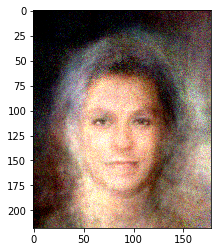

In [11]:
sess = tf.Session()
tf.global_variables_initializer().run(session=sess)

batch_size = 10
nd_steps = 10
ng_steps = 10
dataset = get_data_normalized(10000)

for i in range(5000):
    X_batch = get_batch(batch_size, dataset)
    Z_batch = sample_Z(batch_size, 100)
    _, dloss = sess.run([disc_step, disc_loss], feed_dict={X: X_batch, Z: Z_batch})
    _, gloss = sess.run([gen_step, g  en_loss], feed_dict={Z: Z_batch})

    print("Iterations: %d\t Discriminator loss: %.4f\t Generator loss: %.4f"%(i,dloss,gloss))
Z_batch = sample_Z(1, 100)
X_batch = get_batch(1, dataset)
sess.run(G_sample, feed_dict={X: X_batch, Z: Z_batch})
plt.imshow(tf.reshape(G_sample, shape=(218,178,3)).eval(session=sess, feed_dict={X: X_batch, Z: Z_batch}))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


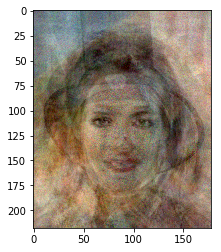

In [13]:
Z_batch = sample_Z(1, 100)
X_batch = get_batch(1, dataset)
sess.run(G_sample, feed_dict={X: X_batch, Z: Z_batch})
plt.imshow(tf.reshape(G_sample, shape=(218,178,3)).eval(session=sess, feed_dict={X: X_batch, Z: Z_batch}))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


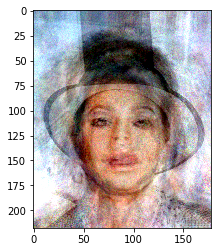

In [14]:
Z_batch = sample_Z(1, 100)
X_batch = get_batch(1, dataset)
sess.run(G_sample, feed_dict={X: X_batch, Z: Z_batch})
plt.imshow(tf.reshape(G_sample, shape=(218,178,3)).eval(session=sess, feed_dict={X: X_batch, Z: Z_batch}))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


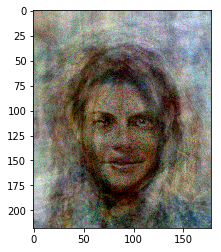

In [17]:
Z_batch = sample_Z(1, 100)
X_batch = get_batch(1, dataset)
sess.run(G_sample, feed_dict={X: X_batch, Z: Z_batch})
plt.imshow(tf.reshape(G_sample, shape=(218,178,3)).eval(session=sess, feed_dict={X: X_batch, Z: Z_batch}))